   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

/tmp/ipykernel_4828/1600621863.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, palette='viridis')


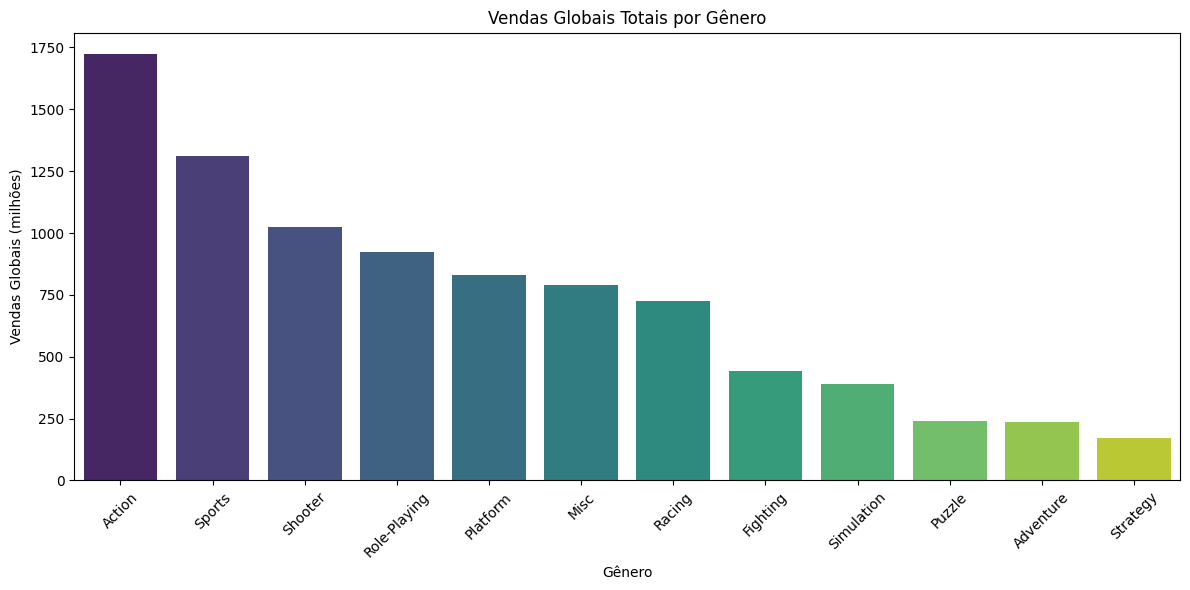

/tmp/ipykernel_4828/1600621863.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=platform_sales, palette='plasma')


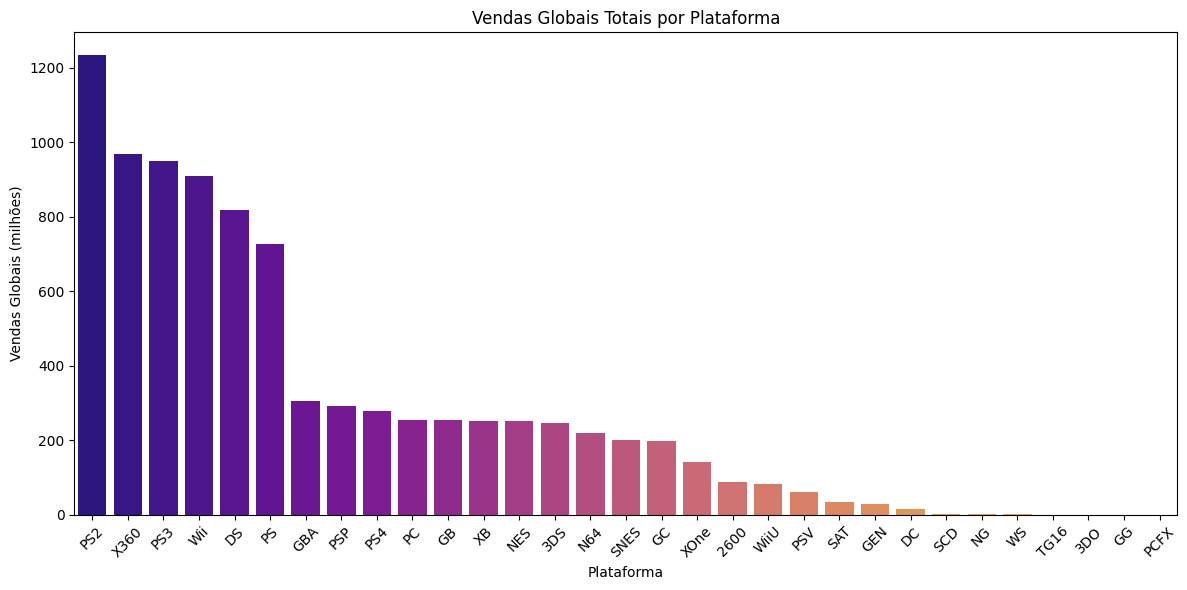

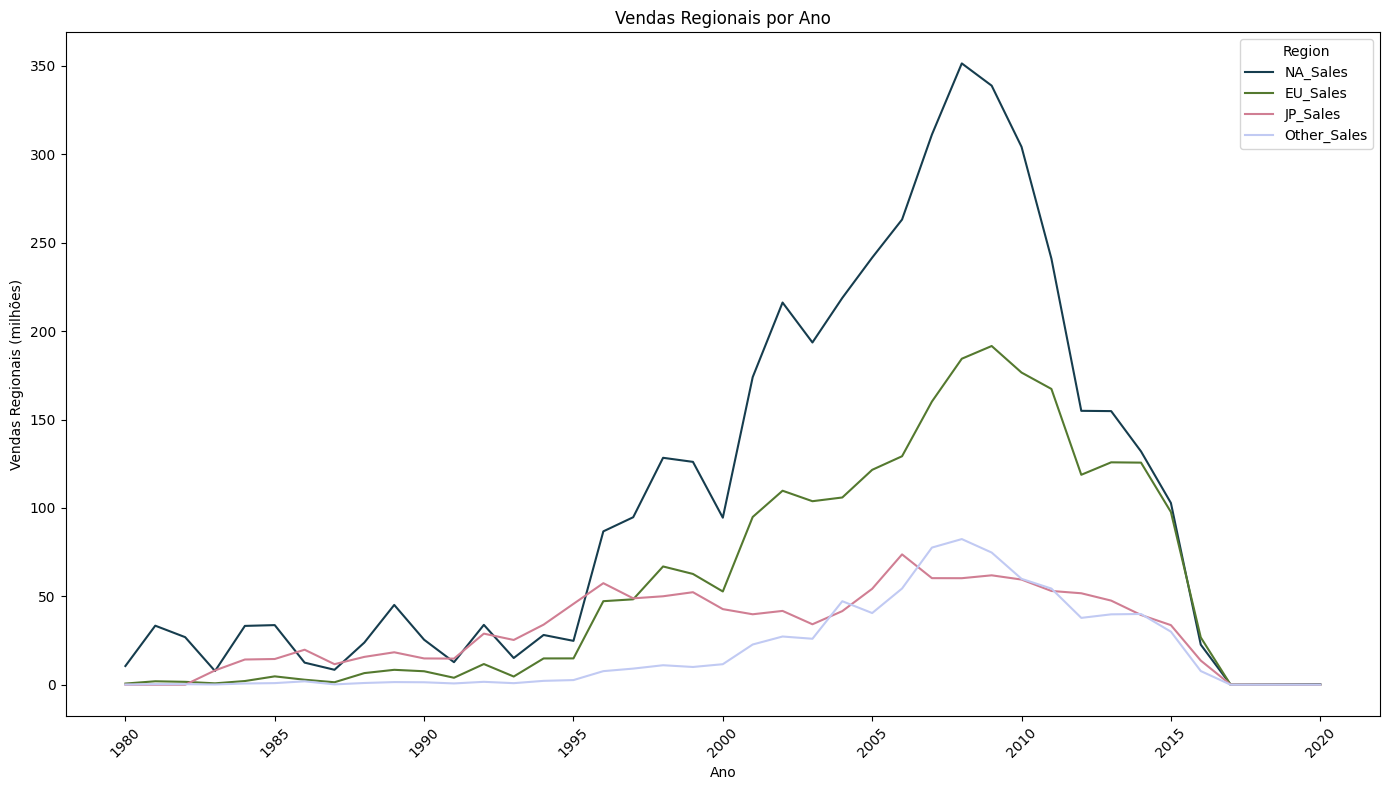

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
file_path = 'vgsales.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas e informações gerais para verificação
print(data.head())
print(data.info())

# Verificar valores ausentes
print(data.isnull().sum())

# Preencher valores ausentes ou remover se necessário
# Aqui vamos remover as linhas com valores ausentes para simplificar
data = data.dropna()

# Gráfico 1: Distribuição de Vendas Globais por Gênero
plt.figure(figsize=(12, 6))
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, palette='viridis')
plt.title('Vendas Globais Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Vendas Globais por Plataforma
plt.figure(figsize=(12, 6))
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Platform', y='Global_Sales', data=platform_sales, palette='plasma')
plt.title('Vendas Globais Totais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Vendas Regionais por Ano
plt.figure(figsize=(14, 8))
sales_by_year_region = data.groupby('Year').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

sales_by_year_region = sales_by_year_region.melt(id_vars='Year', var_name='Region', value_name='Sales')

sns.lineplot(x='Year', y='Sales', hue='Region', data=sales_by_year_region, palette='cubehelix')
plt.title('Vendas Regionais por Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas Regionais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
